# <ins> Project Name: Subaru Impreza 2020 Gas Mileage Data. </ins>
### Author: Iaroslav Grushetskyi


---

## Objective
Test the manufacturer's claim of 31 MPG (combined) by analyzing the data collected over the period of 1 year.

## Vehicle Specifications
Engine Type - Gas <br />
Transmission - Continuously variable-speed automatic <br />
Drive Type - AWD <br />
Cylinders - Flat 4 <br />
Fuel type - Regular unleaded <br />
EPA combined MPG - 31 MPG <br />
Fuel tank capacity - 13.2 gal <br />
Base engine size - 2.0 L


## Data Collection Process



**Duration of Data Collection:**
The data presented in this report was meticulously collected over a span of one year, providing a comprehensive overview of the vehicle's performance.

**Trip Diversity:**
Throughout the data collection period, a diverse range of trips were undertaken. These trips encompassed a wide array of road infrastructures, ranging from small country roads to the high-speed environments of highways and interstates.

**Geographic Scope:**
The majority of the driving activities took place in the state of Ohio, with additional excursions into several neighboring states. This geographic diversity ensures that the data reflects the performance of the vehicle in various regional contexts.

**Seasonal Variation:**
The data collection process considered all four seasons of the year, allowing for a thorough assessment of the vehicle's performance under different weather conditions and temperature ranges.

**Fuel Monitoring:**
Each trip was initiated with a full tank of gas, and data was recorded when the vehicle's "Low Fuel" signal appeared, and the vehicle was brought to a full stop. This methodology ensures that the data accurately captures the vehicle's fuel consumption characteristics.

**Maintenance Adherence:**
The vehicle underwent regular maintenance as per the manufacturer's recommended guidelines, in compliance with local state laws. This adherence to maintenance schedules was vital in maintaining the vehicle's performance and safety throughout the data collection period.

***

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## <ins> Exploratory Data Analysis. </ins>
### In this section, I introduce a few changes to the dataframe to facilitate easier calculations and analysis.

In [2]:
#Reading the data. 
gas_data = pd.DataFrame(pd.read_csv('/Users/Katia/Desktop/Subaru Impreza 2020 Gas Data.csv'))


#Set the Trip column as index.
gas_data.set_index('Trip', inplace = True)

#Renaming all columns.
gas_data.rename(columns = {'Date Of Gas Tank Fill Up': 'Date',
                           'Price($)/Full Tank (13.2 gallons)': 'Price/Tank',
                           'Price($)/gallon': 'Price/Gallon',
                           'Total Miles Driven/Full Tank': 'Miles/Tank'}, inplace = True)


#Converting Date column to datetime64[ns] format.
gas_data['Date'] = pd.to_datetime(gas_data['Date']).dt.strftime('%b-%Y')

#Adding a new column of MPG. The full capacity of the fuel tank is 13.2 gallons. 
#To get a better estimate of MPG I must account for the fuel left in the tank after the "low fuel" indicator appears.
#According to the manufacturer and Subaru forums, 
#the remaining fuel after the "low fuel" indicator is approximately between 2.5 and 3.5 gallons.
#To calculate the best MPG I will use the average of this range, 3 gallons, and subtract it from 13.2 gallons.
#The total amount of fuel used per total miles driven is approximately 10.2 gallons.
#If we divide 'Miles/Tank' by 'Miles/Gallon', we do get 10.2 gallons of fuel used per each record of total miles driven. 
gas_data['Miles/Gallon'] = round(gas_data['Miles/Tank']/10.2, 2)

#Adding new columns: cost per mile and categorizing each month either "cold" or "warm".
warm_months = ['Apr-2023', 'May-2023', 'Jun-2023', 'Jul-2023', 'Aug-2022', 'Aug-2023', 'Sep-2022', 'Sep-2023']
cold_months = ['Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023' ]
gas_data['Season'] = gas_data['Date'].apply(lambda date: 'warm months' if date in warm_months else ('cold months' if date in cold_months else 'unknown month'))
gas_data['Cost/Mile'] = round(gas_data['Price/Gallon']/gas_data['Miles/Gallon'], 2)

gas_data

,Date,Price/Tank,Price/Gallon,Gas Station,Miles/Tank,Miles/Gallon,Season,Cost/Mile
Trip,,,,,,,,
1,Aug-2022,25.28,3.599,BP,358,35.10,warm months,0.10
2,Aug-2022,36.43,3.649,BP,372,36.47,warm months,0.10
3,Aug-2022,39.71,3.609,BP,378,37.06,warm months,0.10
4,Sep-2022,39.23,3.599,BP,401,39.31,warm months,0.09
5,Sep-2022,38.52,3.399,Marathon,387,37.94,warm months,0.09
6,Sep-2022,43.18,3.869,BP,380,37.25,warm months,0.10
7,Oct-2022,42.48,3.999,BP,409,40.10,cold months,0.10
8,Oct-2022,42.11,3.799,Pilot,398,39.02,cold months,0.10
9,Oct-2022,41.68,3.799,Marathon,396,38.82,cold months,0.10


In [57]:
#Reading the basic statistics about the numeric data.
round(gas_data.describe(), 2)

,Price/Tank,Price/Gallon,Miles/Tank,Miles/Gallon,Cost/Mile
count,51.00,51.00,51.00,51.00,51.00
mean,37.15,3.47,369.47,36.22,0.10
std,3.48,0.26,17.13,1.68,0.01
min,25.28,2.90,330.00,32.35,0.08
25%,34.62,3.30,356.50,34.95,0.09
50%,37.46,3.50,370.00,36.27,0.10
75%,39.71,3.60,379.00,37.16,0.10
max,43.18,4.00,409.00,40.10,0.11


## <ins> Visualizing the Data. </ins>
### 1. Line plot of the average price per gallon for each month by gas station.

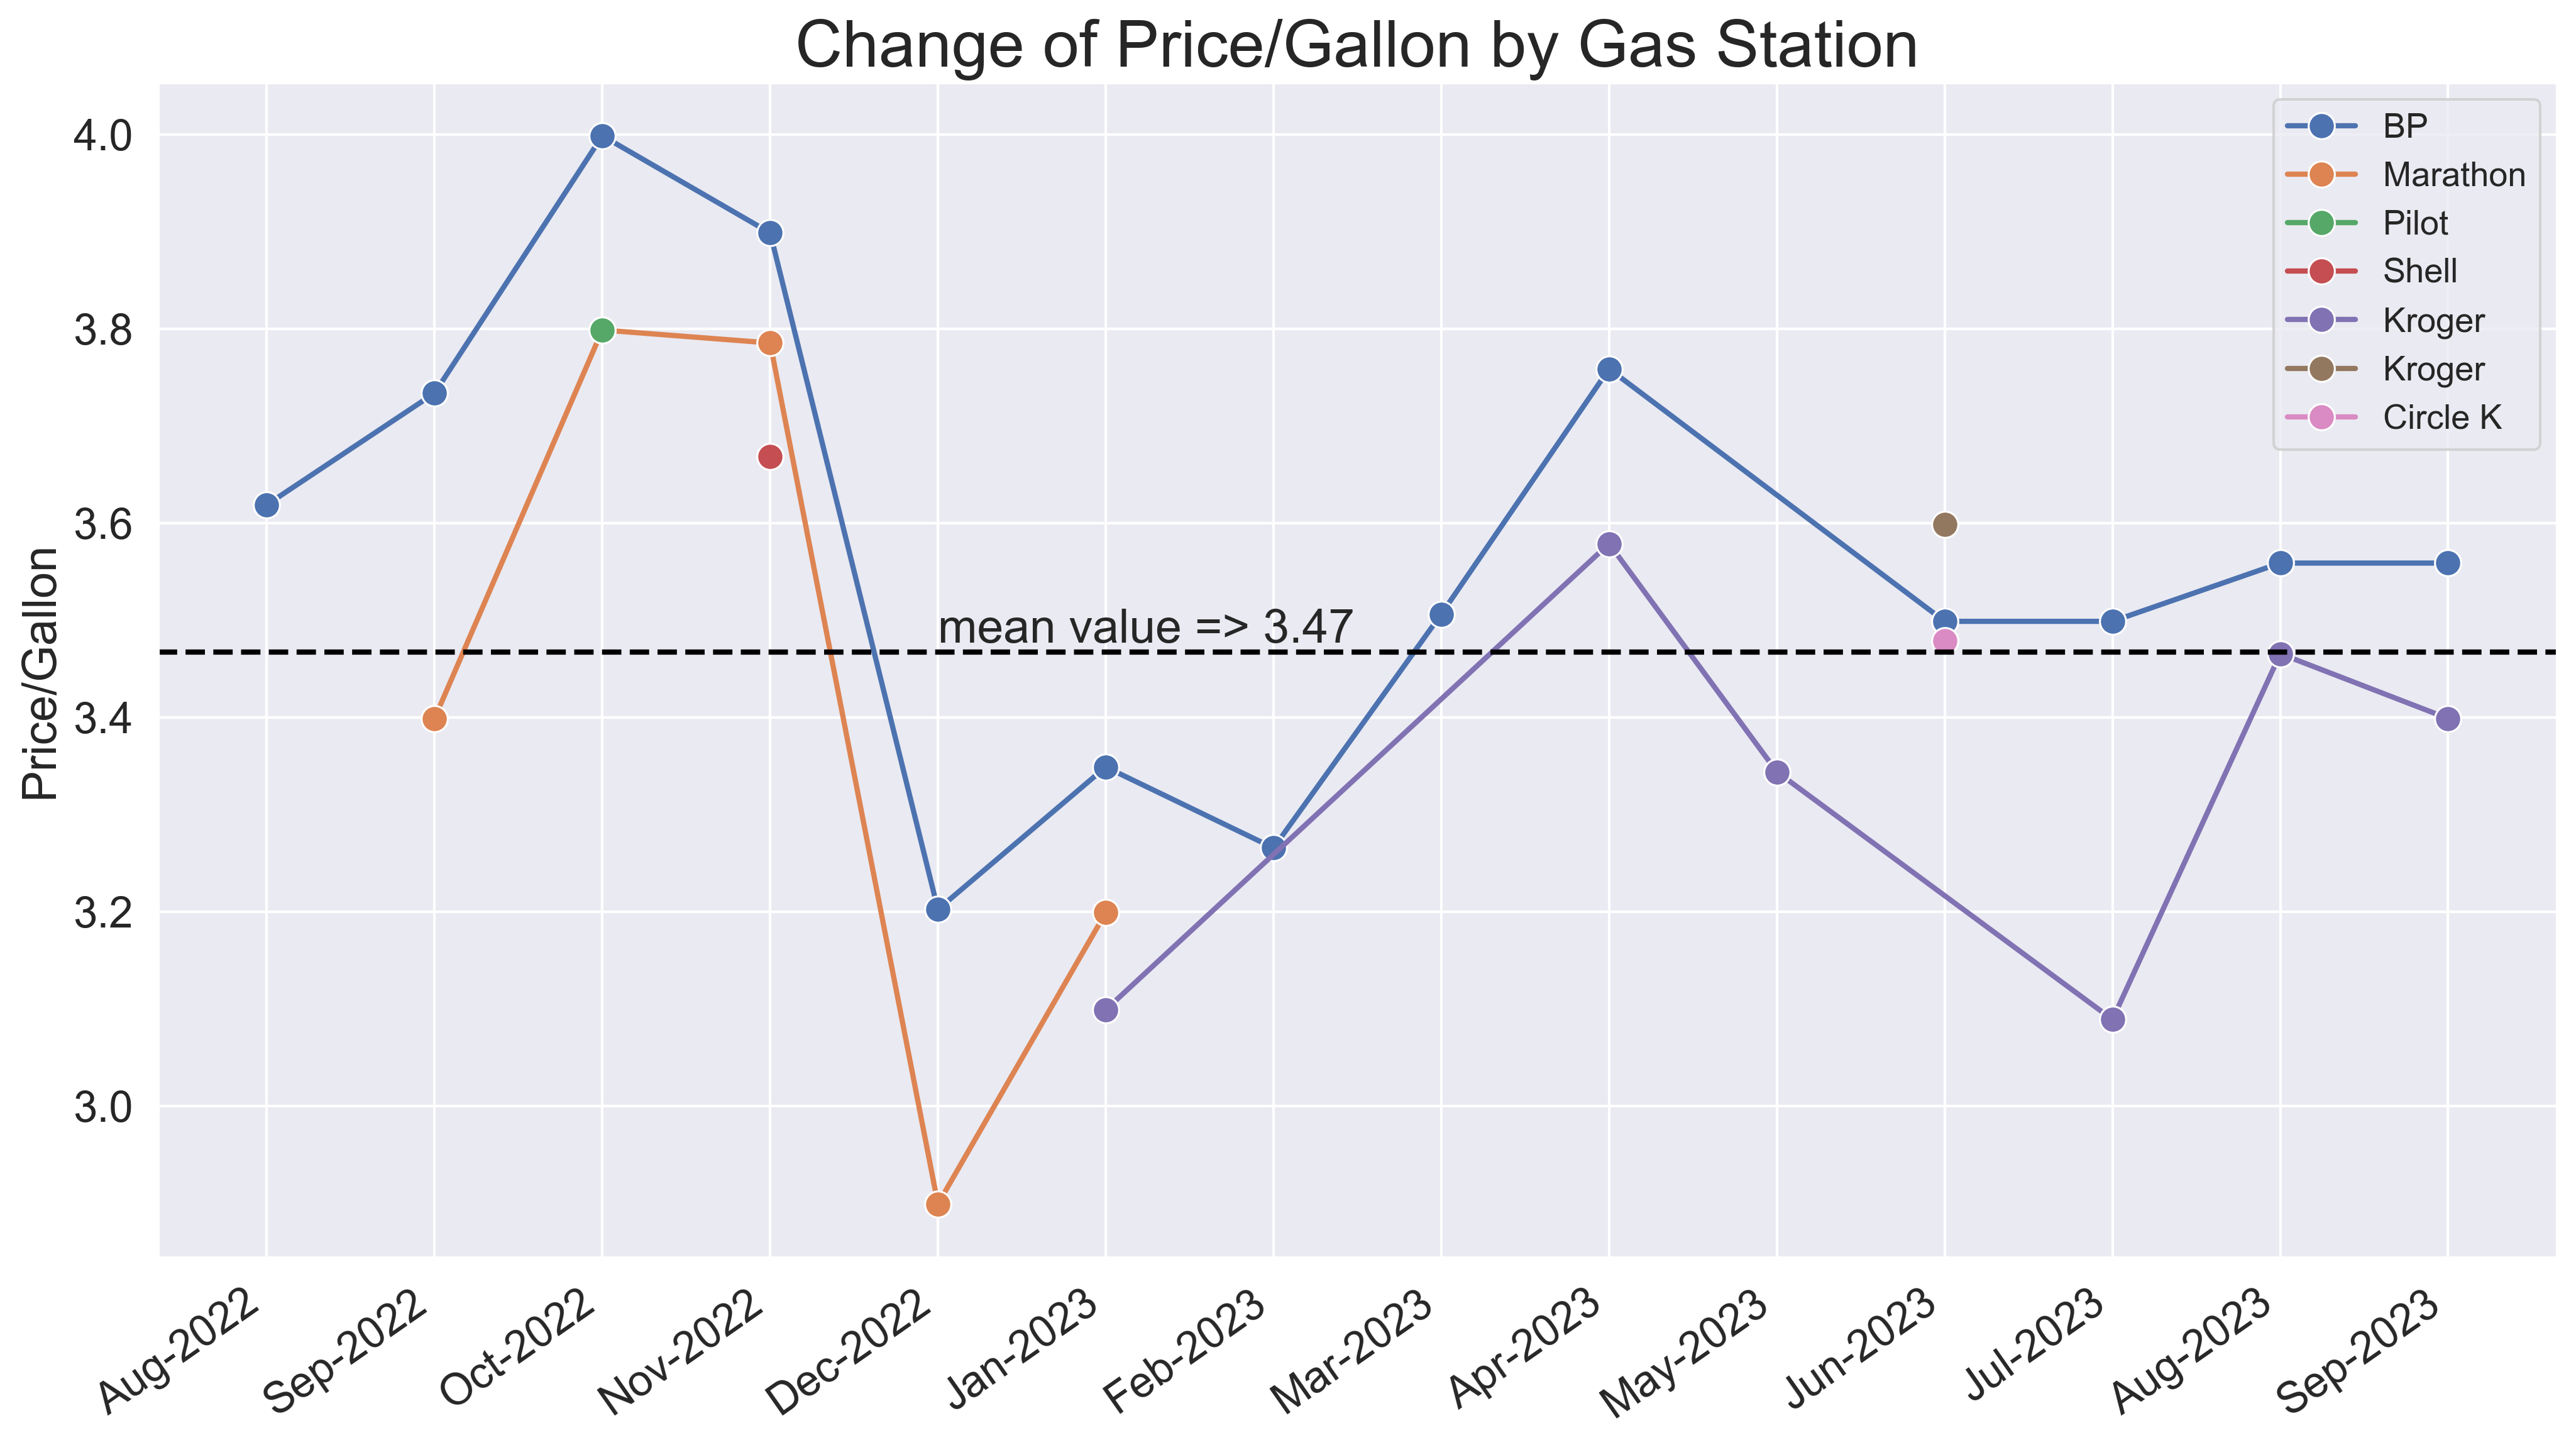

In [4]:
sns.set_theme(font_scale = 1.5, rc={"figure.dpi": 300})
sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
sns.lineplot(x = "Date", 
             y = "Price/Gallon",
             data = gas_data,
             hue = "Gas Station", 
             marker = "o", 
             markersize = 10,
             ci = None,
             lw = 2)
plt.axhline(y = gas_data['Price/Gallon'].mean(), color = 'black',ls = '--', lw = 2)
plt.xticks(rotation=35, ha='right') 
plt.xlabel('')
plt.title('Change of Price/Gallon by Gas Station', size = 25)
plt.text('Dec-2022', gas_data['Price/Gallon'].mean()+0.01, 'mean value => 3.47')
plt.legend(fontsize = 13)
plt.tight_layout();

In [5]:
#write conclusion for the plot_1 

### 2. Fuel cost per mile during cold and warm months.


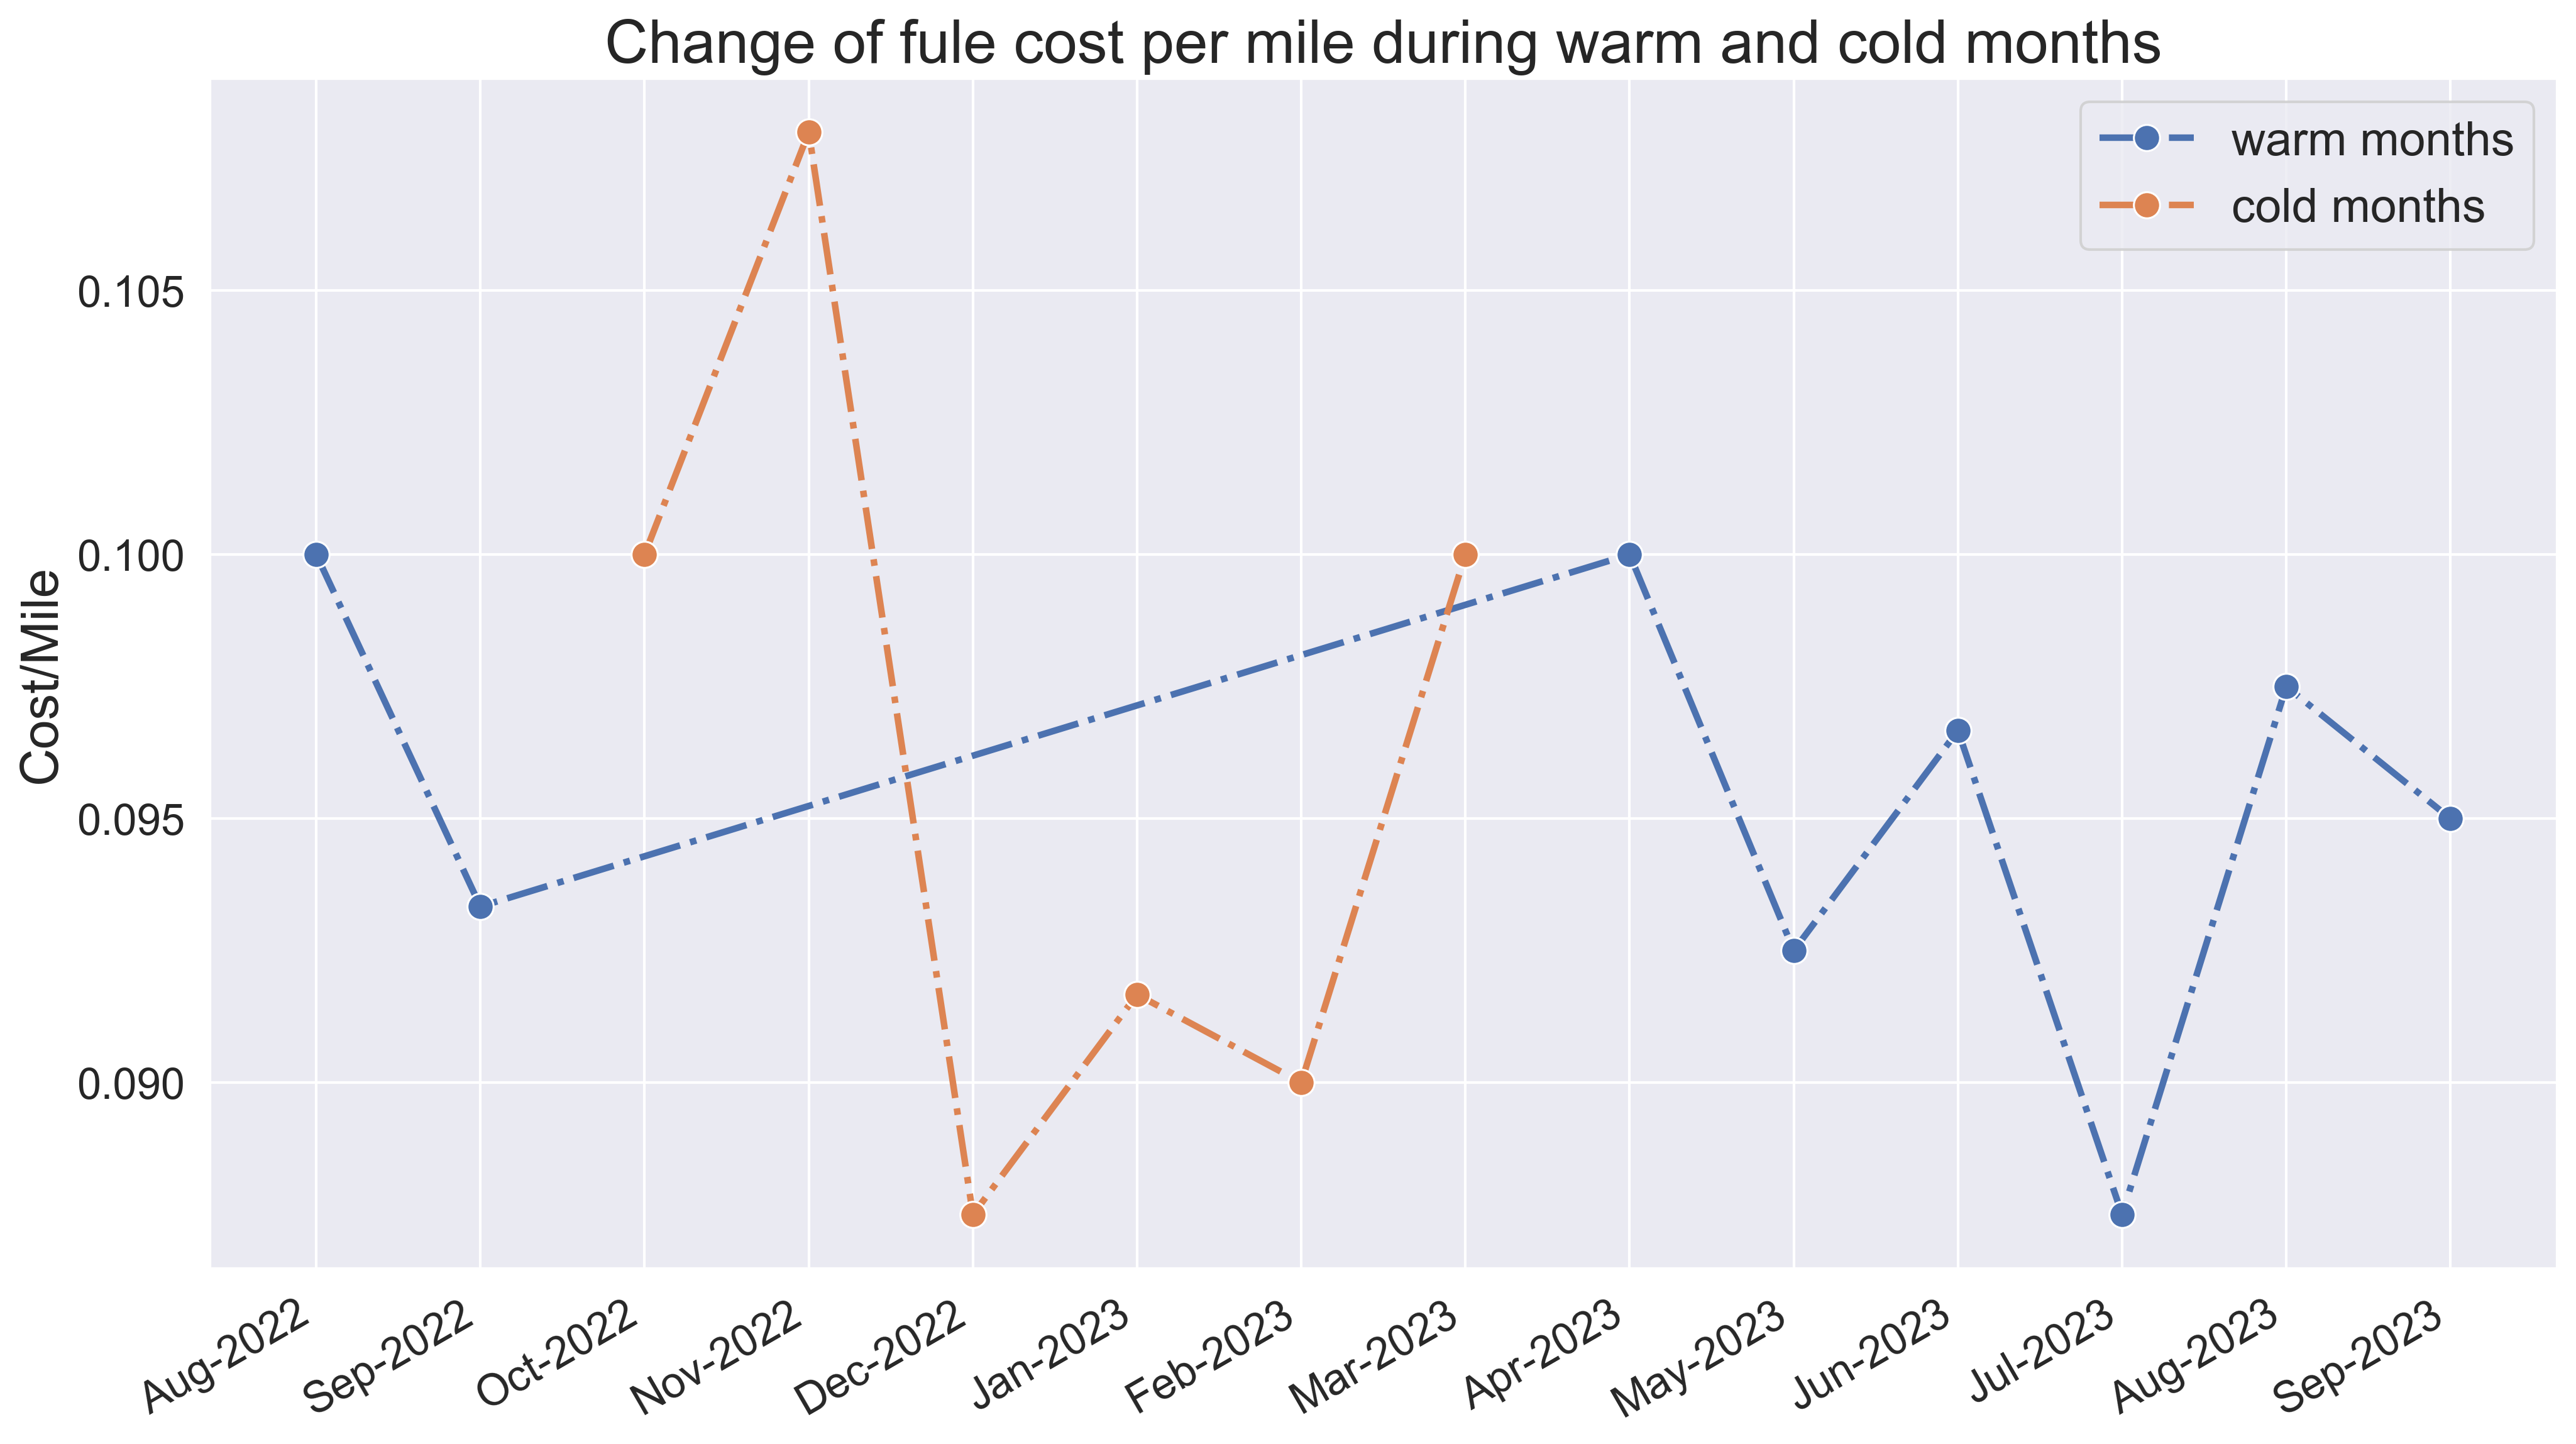

In [6]:
sns.set_theme(font_scale = 1.5, rc={"figure.dpi": 300})
sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
sns.lineplot(x = 'Date', 
             y = 'Cost/Mile', 
             data = gas_data, 
             hue = 'Season', 
             ci = None, 
             marker = 'o', 
             markersize = 10, 
             lw = 2.5,
             ls = '-.')
plt.xticks(rotation = 30, ha='right')
plt.xlabel('')
plt.ylabel('Cost/Mile', fontsize = 20)
plt.title('Change of fule cost per mile during warm and cold months', size = 23)
plt.legend(fontsize = 18)
plt.tight_layout();

### 3. Bar plot of total amount spent each month.

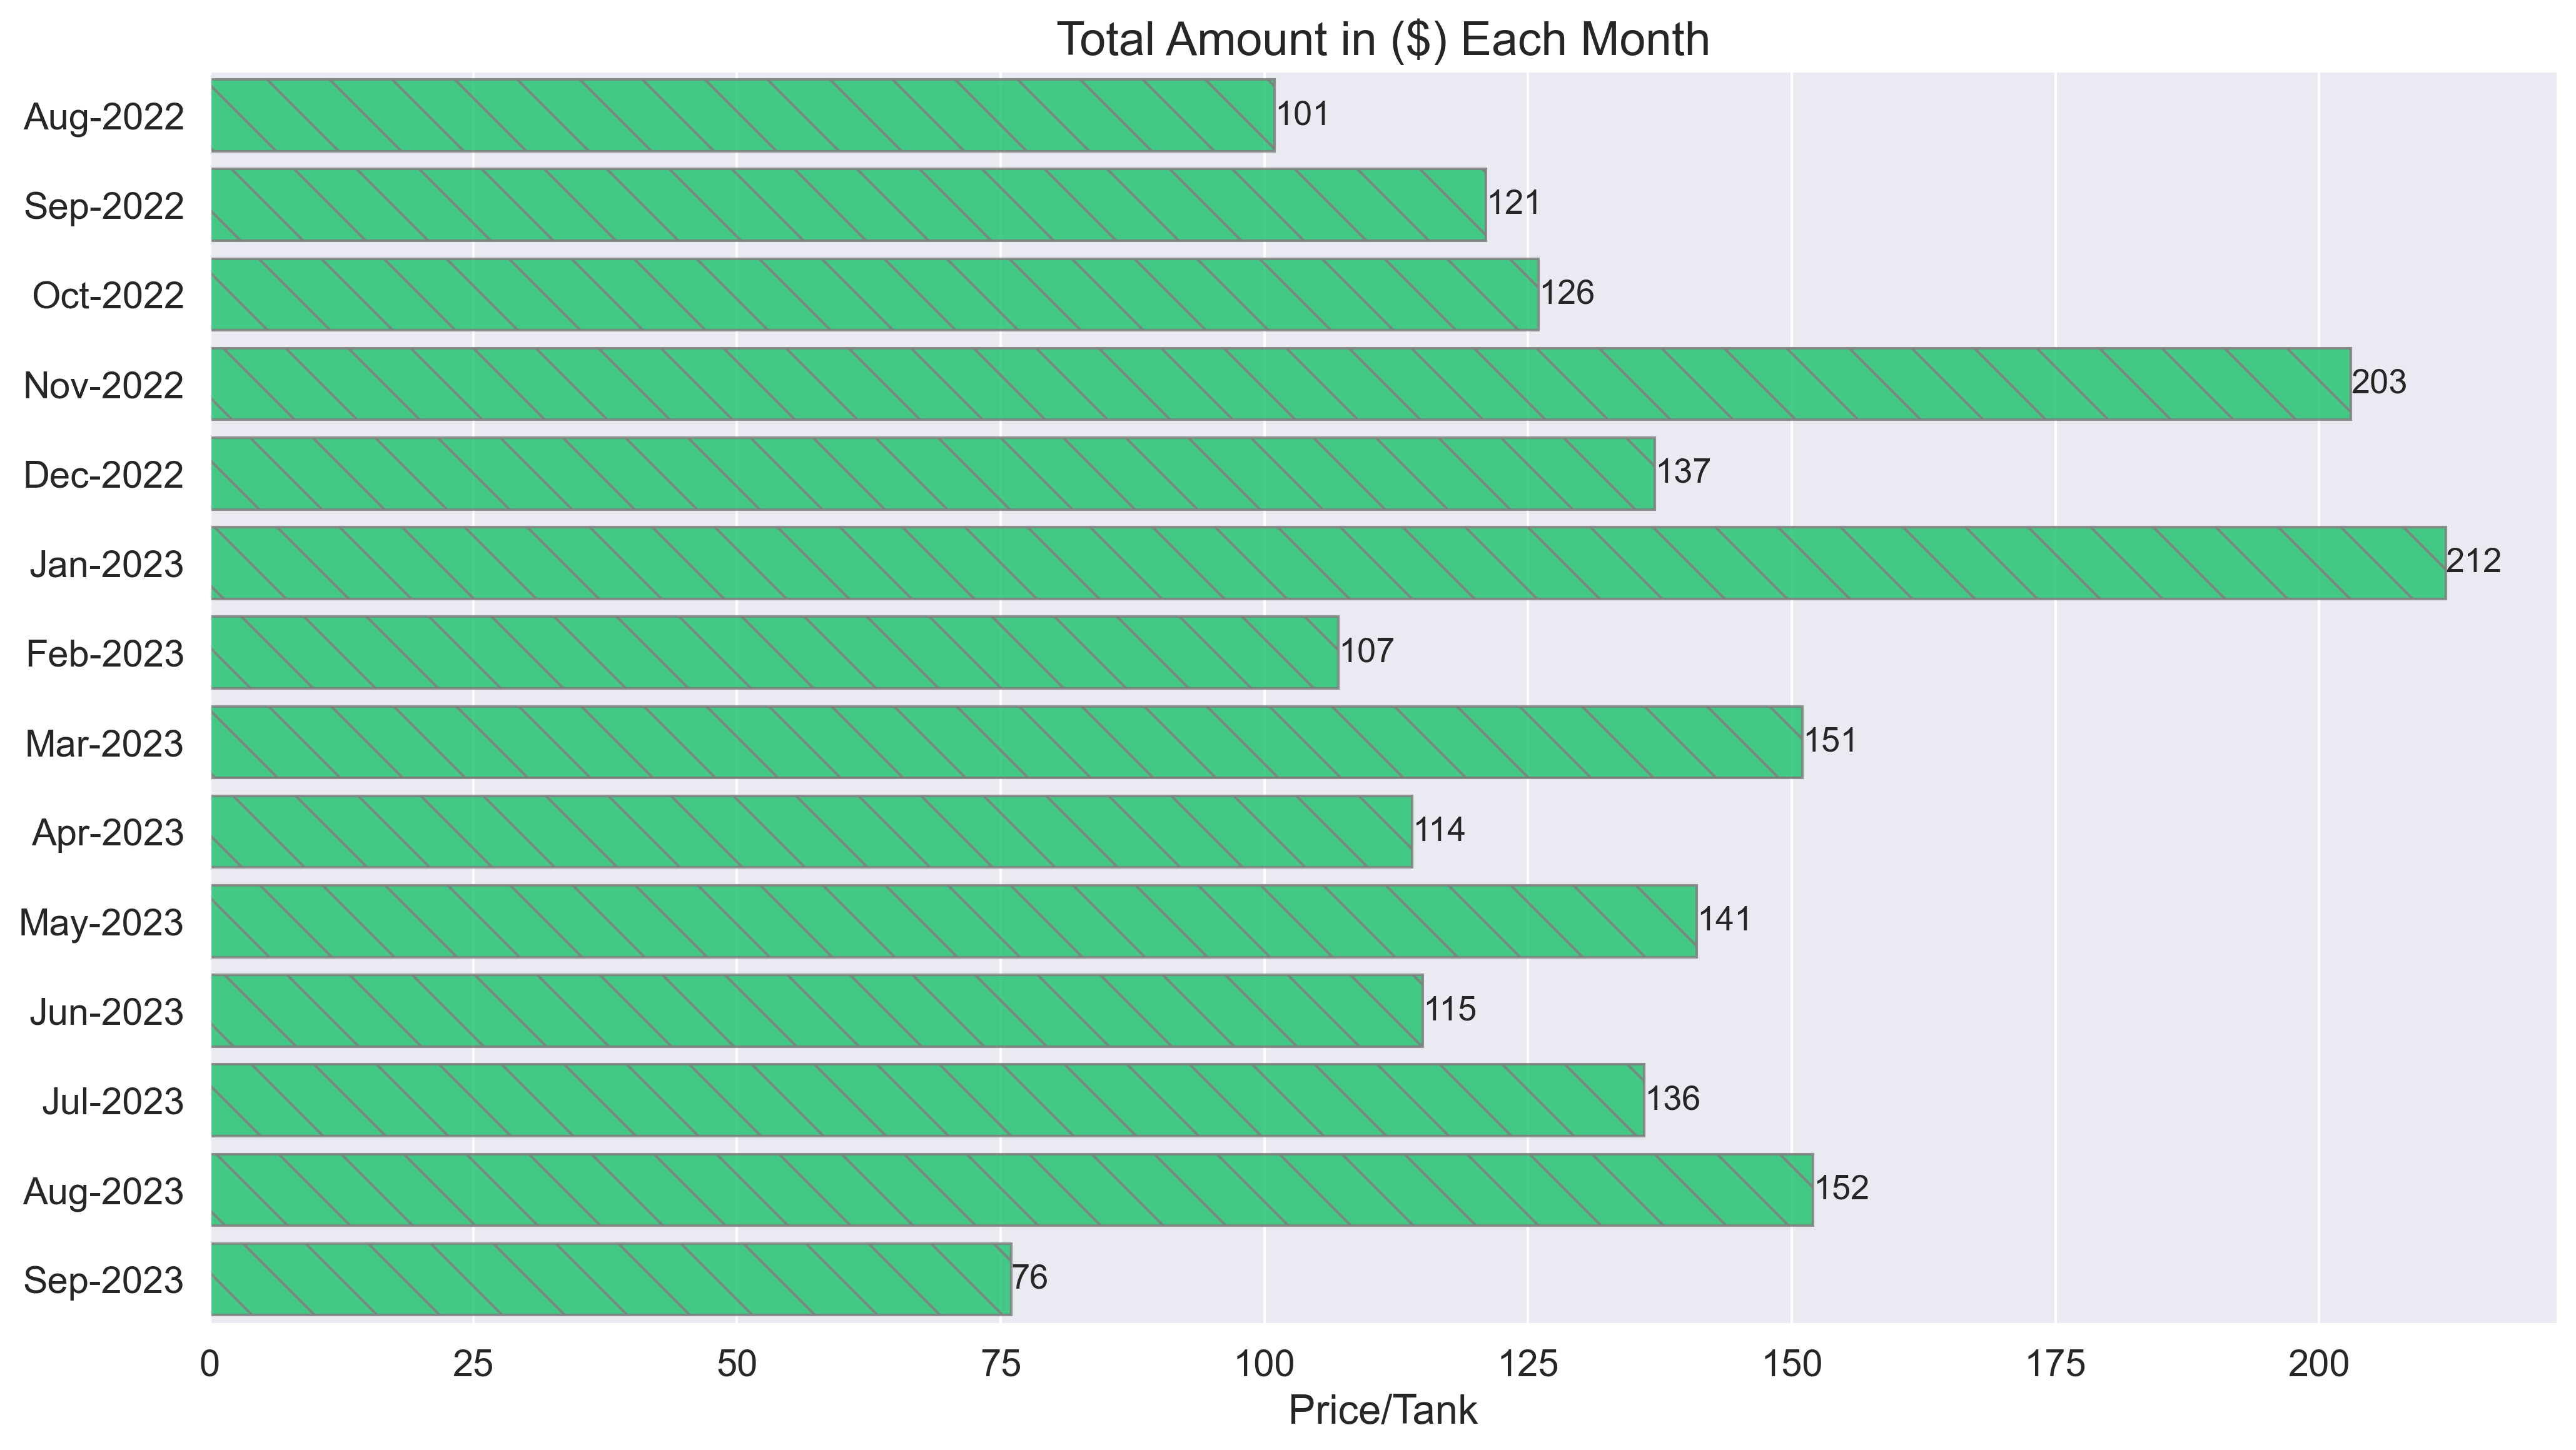

In [7]:
sns.set_theme(font_scale = 1.3, rc={"figure.dpi": 300})
plt.figure(figsize=(14, 8))
plot_2 = sns.barplot(data = gas_data,
                     x = round(gas_data['Price/Tank']),
                     y = 'Date',
                     estimator = 'sum',
                     errorbar = None,
                     color = '#0cdc73', alpha = 0.85, hatch = '\\', edgecolor = 'gray');
plot_2.bar_label(plot_2.containers[0], fontsize=13)
plt.ylabel('')
plt.title('Total Amount in ($) Each Month', size = 18);
plt.tight_layout();

In [8]:
#write conclusion for plot_2

### 4. Amount of money spent at each gas station (%).

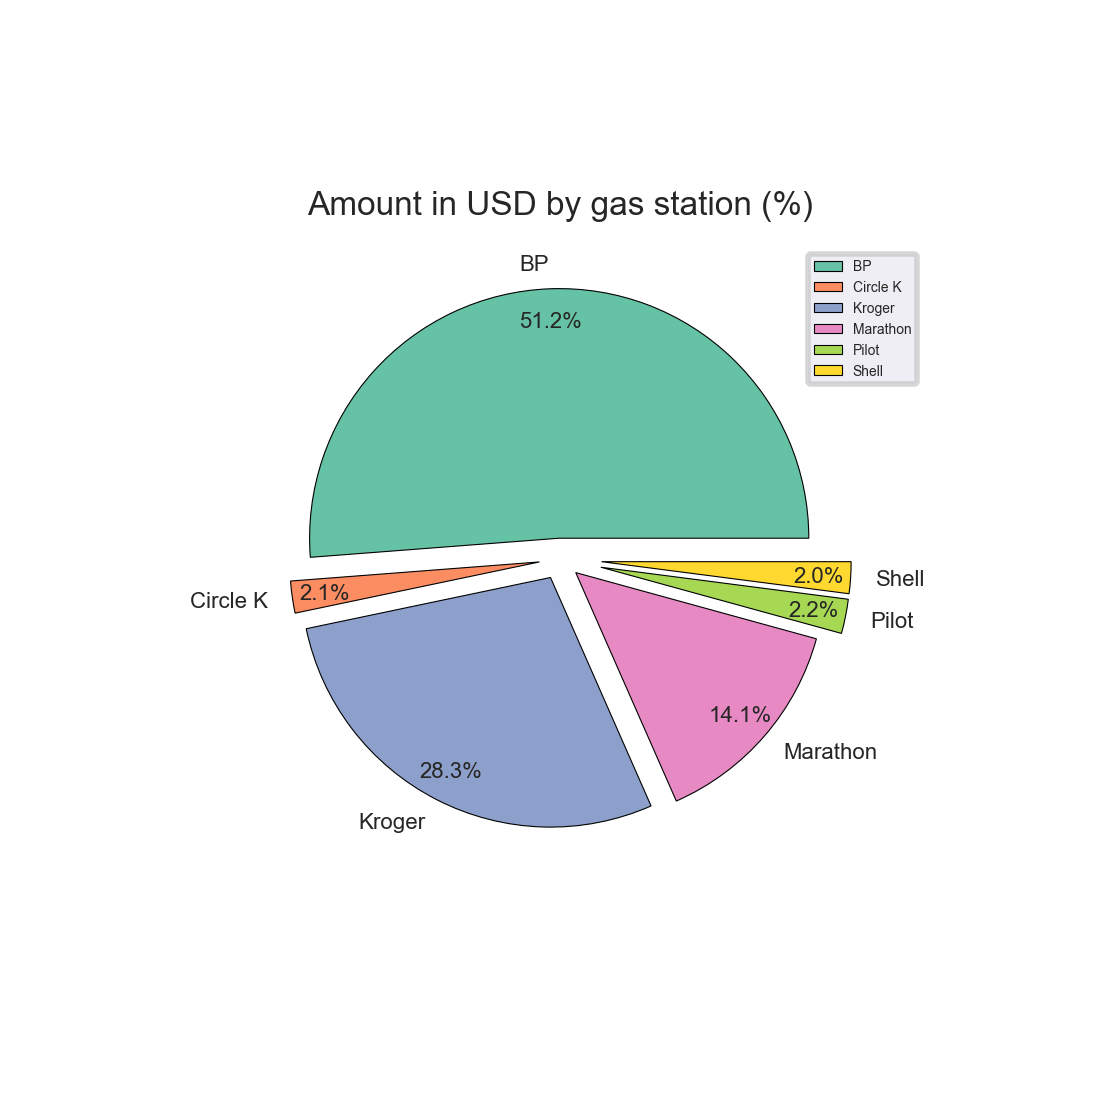

In [28]:
total_by_gst_df = pd.DataFrame({'Gas Station': ['BP', 'Circle K', 'Kroger', 'Kroger', 'Marathon', 'Pilot', 'Shell'],
                     'Price/Tank': [970.48, 39.23, 496.71, 39.71, 267.67, 42.11, 38.84]})
total_by_gst = total_by_gst_df.groupby('Gas Station', as_index = False)['Price/Tank'].agg('sum')
sns.set_theme(font_scale = 15, rc={"figure.dpi": 400})
plt.figure(figsize=(14, 8))
plt.pie(total_by_gst['Price/Tank'], 
        labels = total_by_gst['Gas Station'], 
        colors = sns.color_palette('Set2'),
        wedgeprops = {'linewidth': 0.2,'edgecolor': 'black'}, 
        explode = [0.05, 0.05, 0.05, 0.05, 0.1, 0.1],
        autopct = '%1.1f%%',
        radius = 0.6,
        pctdistance = 0.87,
        textprops={'fontsize': 4})
plt.title('Amount in USD by gas station (%)', size = 6, y = 0.8)
plt.legend(loc = 'upper right', fontsize = 2.5, bbox_to_anchor = (0.85, 0.8))
plt.tight_layout();

In [10]:
#write a conclusion
#maybe do something with total miles column

## <ins> Inference and Hypothesis Testing. </ins>
### 1. Distribution of MPG data.

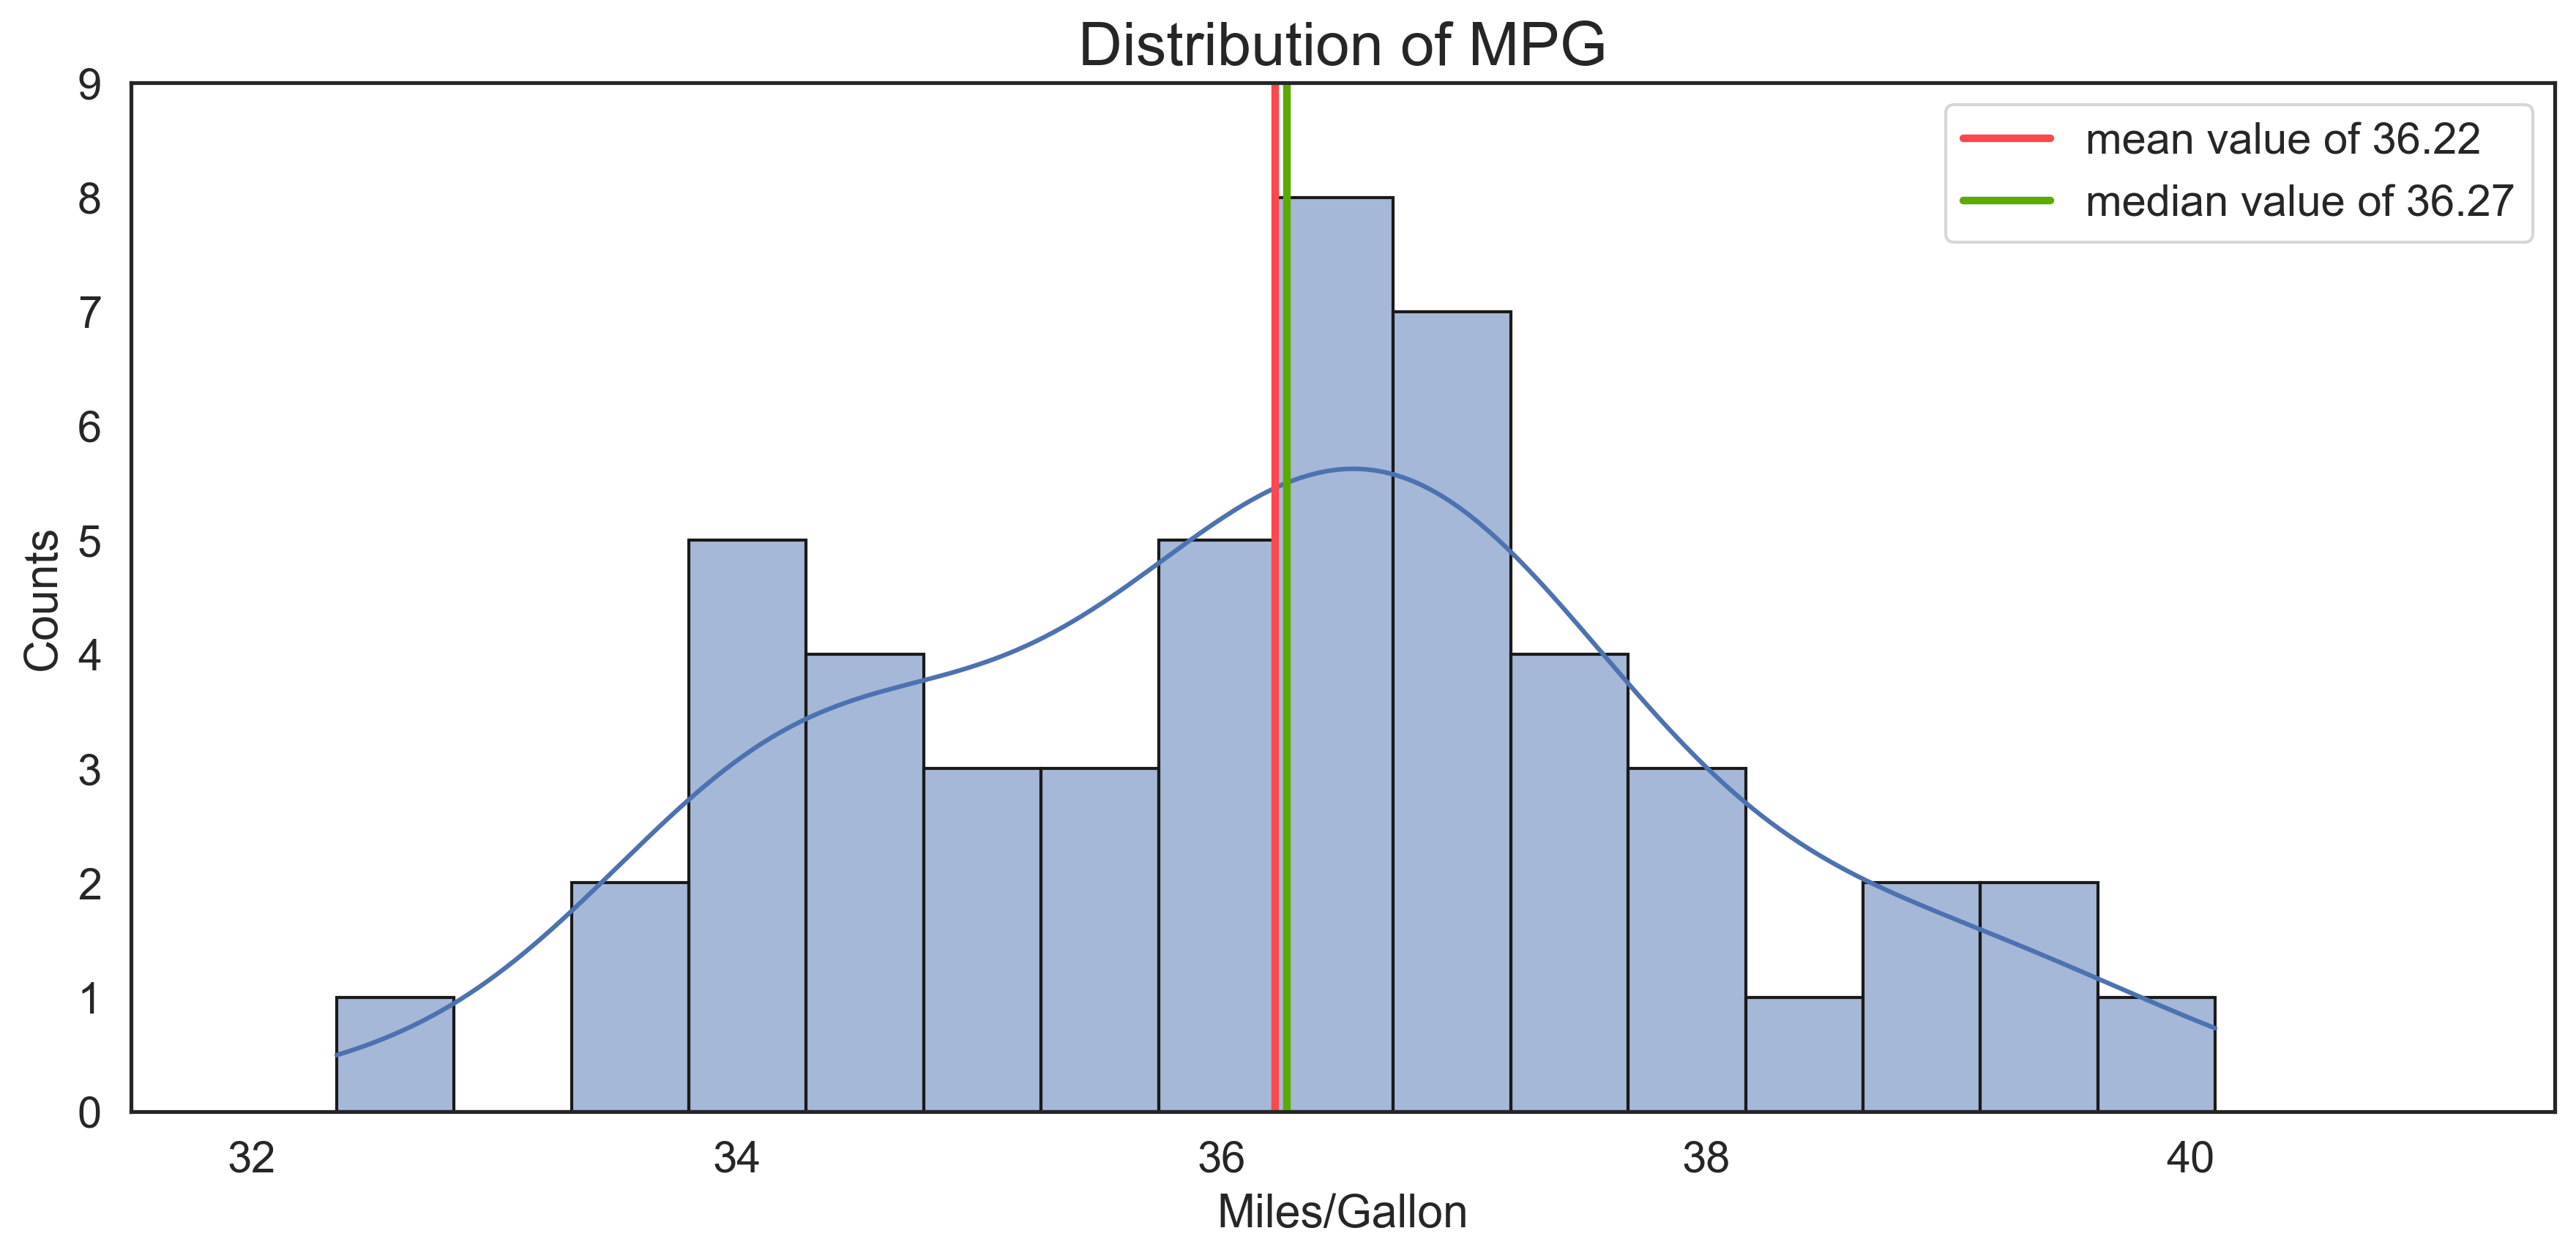

In [11]:
mean_mpg = round(gas_data['Miles/Gallon'].mean(), 2)
median_mpg = round(gas_data['Miles/Gallon'].median(), 2)

sns.set_theme(font_scale = 1.3, rc={"figure.dpi": 300})
sns.set_style("white")
plt.figure(figsize=(12,6))
sns.histplot(gas_data, 
             x = 'Miles/Gallon', 
             binwidth = 0.5, 
             edgecolor = 'k', 
             alpha = 0.5,
             kde = True)
plt.axvline(gas_data['Miles/Gallon'].mean(), color = '#ff474c',ls = '-', lw = 2.5, label = f'mean value of {mean_mpg}')
plt.axvline(gas_data['Miles/Gallon'].median(), color = '#5ca904',ls = '-', lw = 2.5, label = f'median value of {median_mpg}')
plt.xlabel('Miles/Gallon', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xlim(31.5, 41.5)
plt.ylim(0,9)
plt.title('Distribution of MPG', fontsize = 20)
plt.tight_layout()
plt.legend();

In [ ]:
#write conclusion

### 2. Shapiro-Wilk test on Normality of MPG data.
#### The significance level $\alpha$ = 0.05 
#### $H_0$ hypothesis: data is normally distributed vs $H_A$ hypothesis: data is not normally distributed.


In [13]:
mpt_sta, p_val = scipy.stats.shapiro(gas_data['Miles/Gallon'])
if p_val < 0.05:
    print('P-value:', round(p_val, 2), 'reject null hypothesis - our data is not normally distributed')
else:
    print('P-value:', round(p_val, 2), 'fail to reject null hypothesis - the data is normally distributed.')
    

P-value: 0.76 fail to reject null hypothesis - the data is normally distributed.


#### Conclusion: the Shapiro-Wilk test of normality shows the p-value of 0.76, which is significantly bigger than regection value of 0.05. The data is normally distributed. 

### 3. One Sample T-test.
#### In this section I perform a one sample T-test to test the manufacturer's claim of 31 MPG (combined) output by the vehicle.
#### The variance of the overall MPG is unknown.
#### The sample mean is 36.22 MPG.
#### Hypothesis:  $H_0$ - $\mu$ = 31 MPG vs $H_A$ - $\mu$ $>$ 31 MPG (right-sided test).

In [14]:
mpg_t_stat, p_val = scipy.stats.ttest_1samp(a = gas_data['Miles/Gallon'], popmean=31, alternative = 'greater')

print('----------------------------------------------------------------------------------------------')
print(f"T-statistic: {round(mpg_t_stat, 2)}")
print(f"P-value: {np.format_float_positional(p_val, trim='-')}") 
print('This indicates the significant difference between the claimed and sampled means.')
print('There is evidence the vehicle outputs more MPG than what is being claimed by the manufacturer.')
print('----------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------
T-statistic: 22.21
P-value: 0.0000000000000000000000000007353266990192801
This indicates the significant difference between the claimed and sampled means.
There is evidence the vehicle outputs more MPG than what is being claimed by the manufacturer.
----------------------------------------------------------------------------------------------


#### KDE plot of MPG with T - test results.

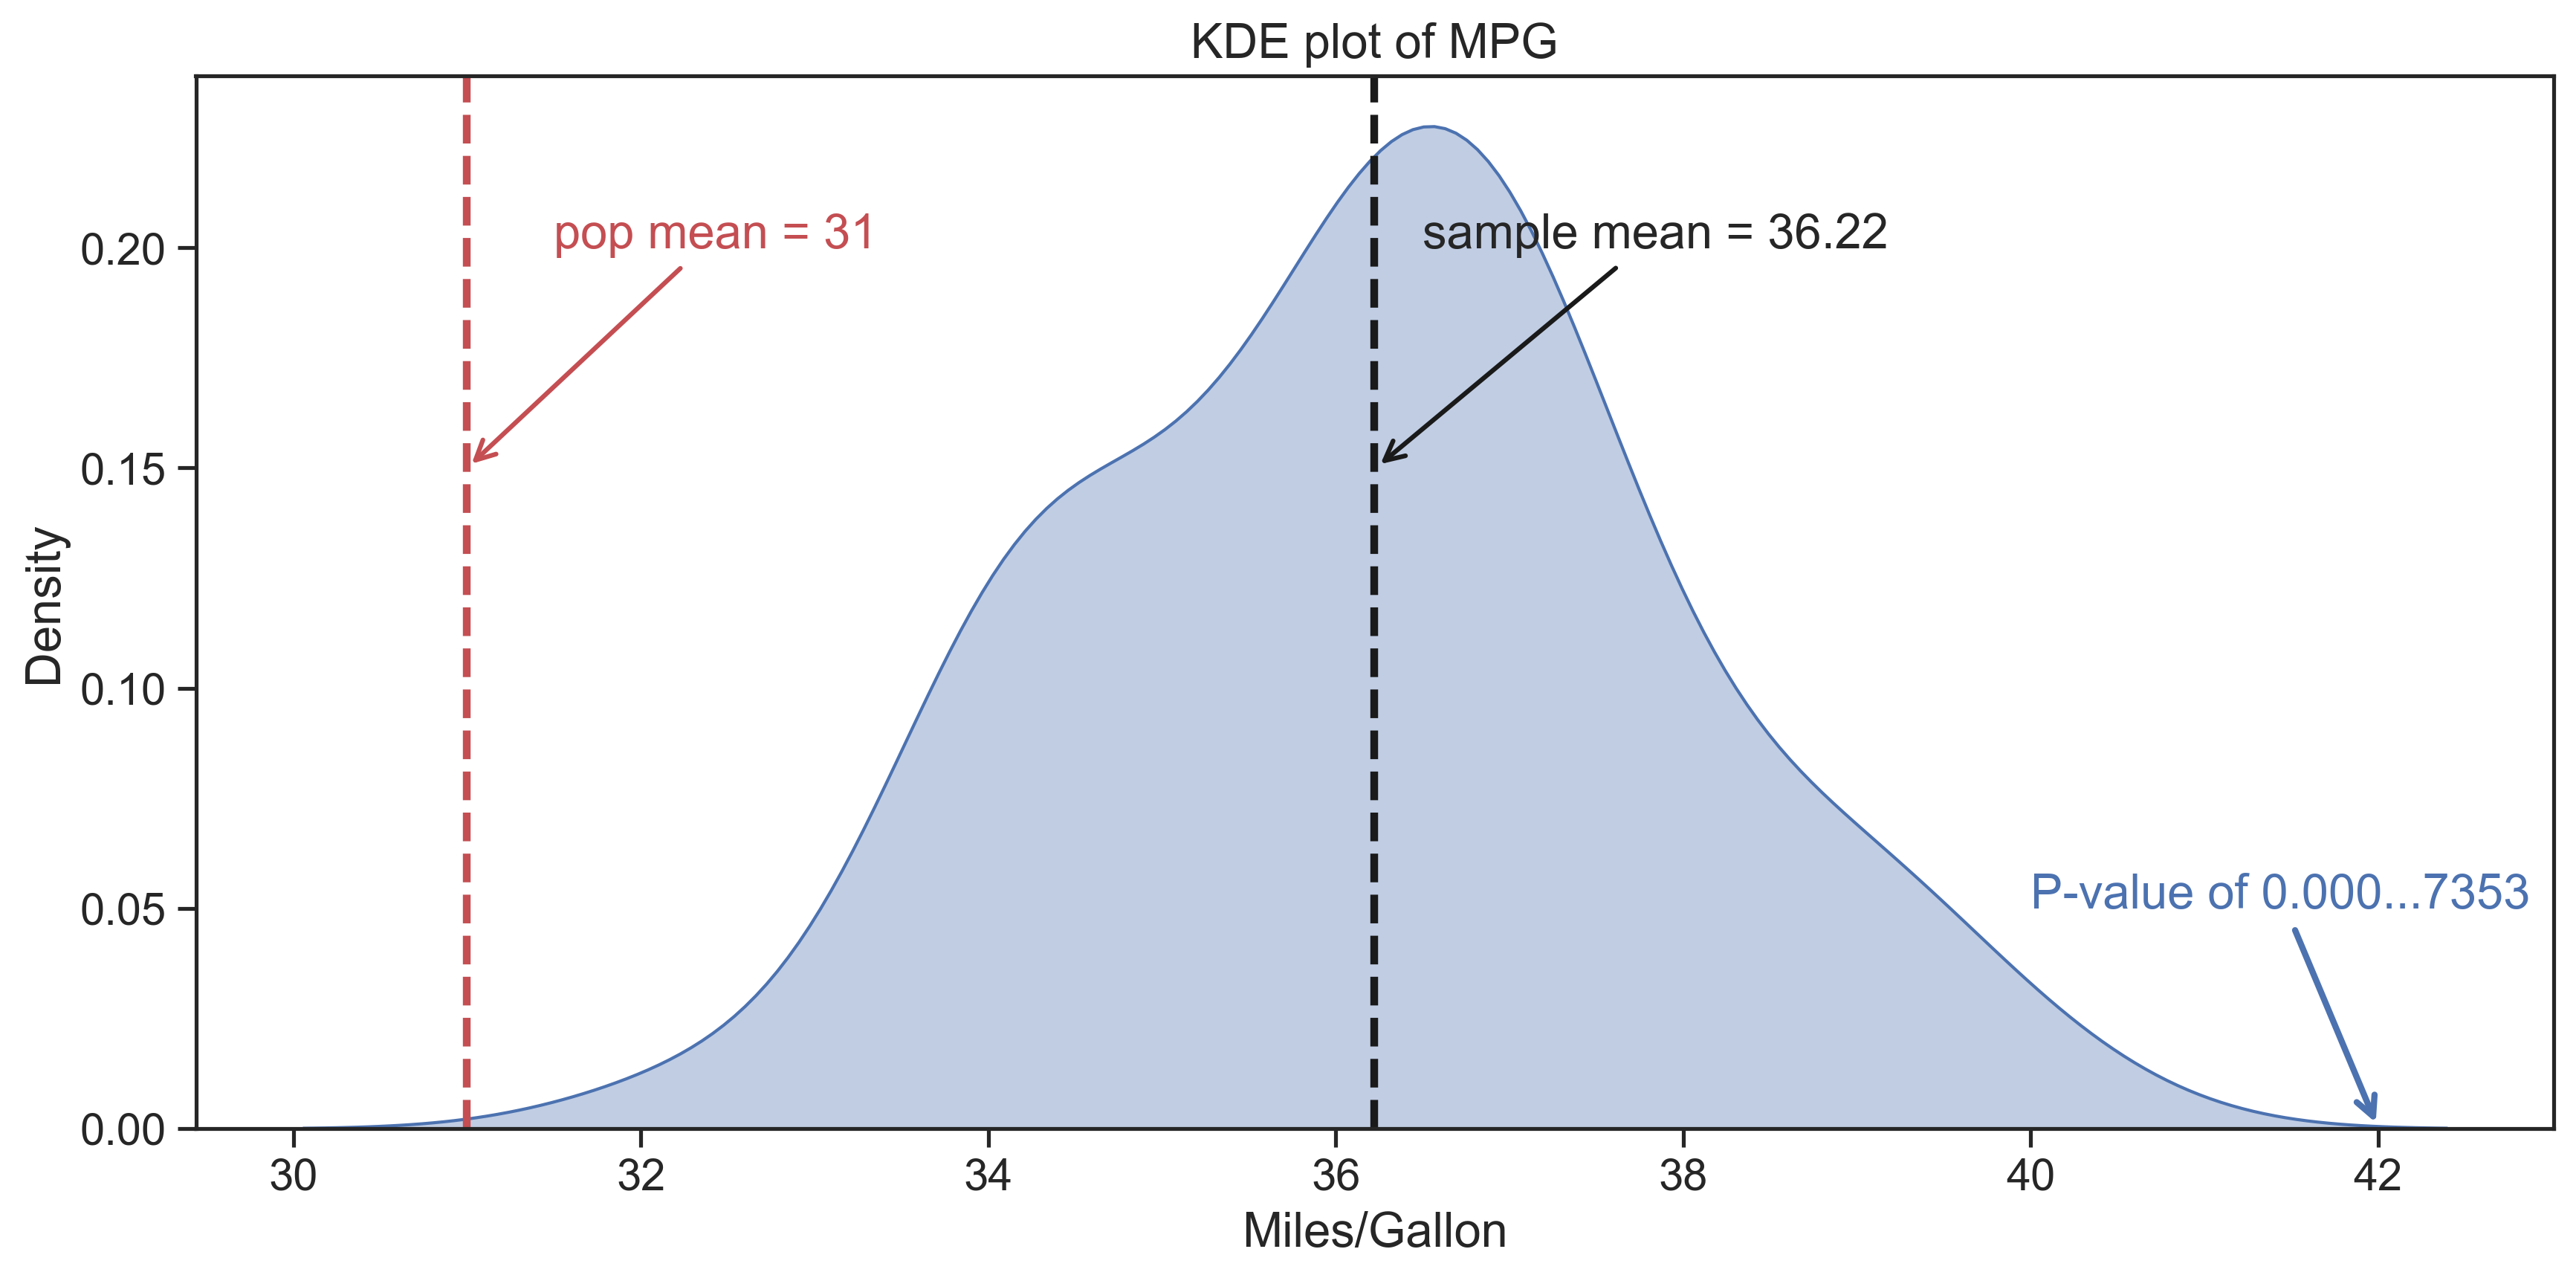

In [15]:
sns.set_theme(font_scale = 1.3, rc={"figure.dpi": 300})
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.kdeplot(gas_data['Miles/Gallon'], fill=True, alpha = 0.35)
plt.axvline(gas_data['Miles/Gallon'].mean(), color = 'k',ls = '--', lw = 2.5, label = 'sample mean of 36.22')
plt.axvline(31, color = 'r',ls = '--', lw = 2.5, label = 'population mean of 31')
plt.annotate('P-value of 0.000...7353', color='b', xy=(42, 0.00), xytext = (40, 0.05), arrowprops=dict(color = 'b', arrowstyle='->', lw = 2))
plt.annotate('pop mean = 31', color='r', xy=(31, 0.15), xytext = (31.5, 0.2), arrowprops=dict(color = 'r', arrowstyle='->', lw = 1.5))
plt.annotate('sample mean = 36.22', xy=(36.23, 0.15), xytext = (36.5, 0.2), arrowprops=dict(color = 'k', arrowstyle='->', lw = 1.5))
plt.title('KDE plot of MPG')
plt.tight_layout();

### 4. Paired T-test to compare the MPG means of cold and warm months. 
#### In this section I conduct a paired T-test to see if the difference between the mean MPG during warm and cold months is significantly different.
#### The variance of the overall MPG is unknown.
#### Hypothesis: $H_0$ - $\mu_1$ = $\mu_2$ vs $H_A$ - $\mu_1$ $\neq$ $\mu_2$

In [16]:
warm_months = ['Apr-2023', 'May-2023', 'Jun-2023', 'Jul-2023', 'Aug-2022', 'Aug-2023', 'Sep-2022', 'Sep-2023']
cold_months = ['Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023' ]

warm_months_df = pd.DataFrame(gas_data[:50][gas_data['Date'].isin(warm_months)])
cold_months_df = pd.DataFrame(gas_data[:50][gas_data['Date'].isin(cold_months)])

print('---------------------------------------------------------------------------------------------------------')
print('If the ratio of the lager sample variance to the smaller is less than 4, assume the variances are equal.')
print('Warm months variance:', round(np.var(warm_months_df['Miles/Gallon']), 2))
print('Cold months variance:', round(np.var(cold_months_df['Miles/Gallon']), 2))
print('The ratio is', round(3.71/1.86, 2))
print('---------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------
If the ratio of the lager sample variance to the smaller is less than 4, assume the variances are equal.
Warm months variance: 1.86
Cold months variance: 3.71
The ratio is 1.99
---------------------------------------------------------------------------------------------------------


In [17]:
print('-----------------------------------------------')
print('The average MPG during warm months is :', round(warm_months_df['Miles/Gallon'].mean(), 2))
print('The average MPG during cold months is :', round(cold_months_df['Miles/Gallon'].mean(), 2))
print('Is the differnce of', round(36.3 - 36.1, 2), 'sifnificant enough?')
print('-----------------------------------------------')
print('The Paired T - test:')
t_statistic, p_value = scipy.stats.ttest_rel(a=warm_months_df['Miles/Gallon'], b=cold_months_df['Miles/Gallon'])
print(f"T-statistic: {round(t_statistic, 2)}")
print(f"P-value: {round(p_value, 2)}")
print('Conclusion: the p-value is larger than the significance level of 0.05, insufficient evidence to show the difference between the means.')

-----------------------------------------------
The average MPG during warm months is : 36.3
The average MPG during cold months is : 36.1
Is the differnce of 0.2 sifnificant enough?
-----------------------------------------------
The Paired T - test:
T-statistic: 0.4
P-value: 0.69
Conclusion: the p-value is larger than the significance level of 0.05, insufficient evidence to show the difference between the means.


#### KDE plots of Paired T - test results.


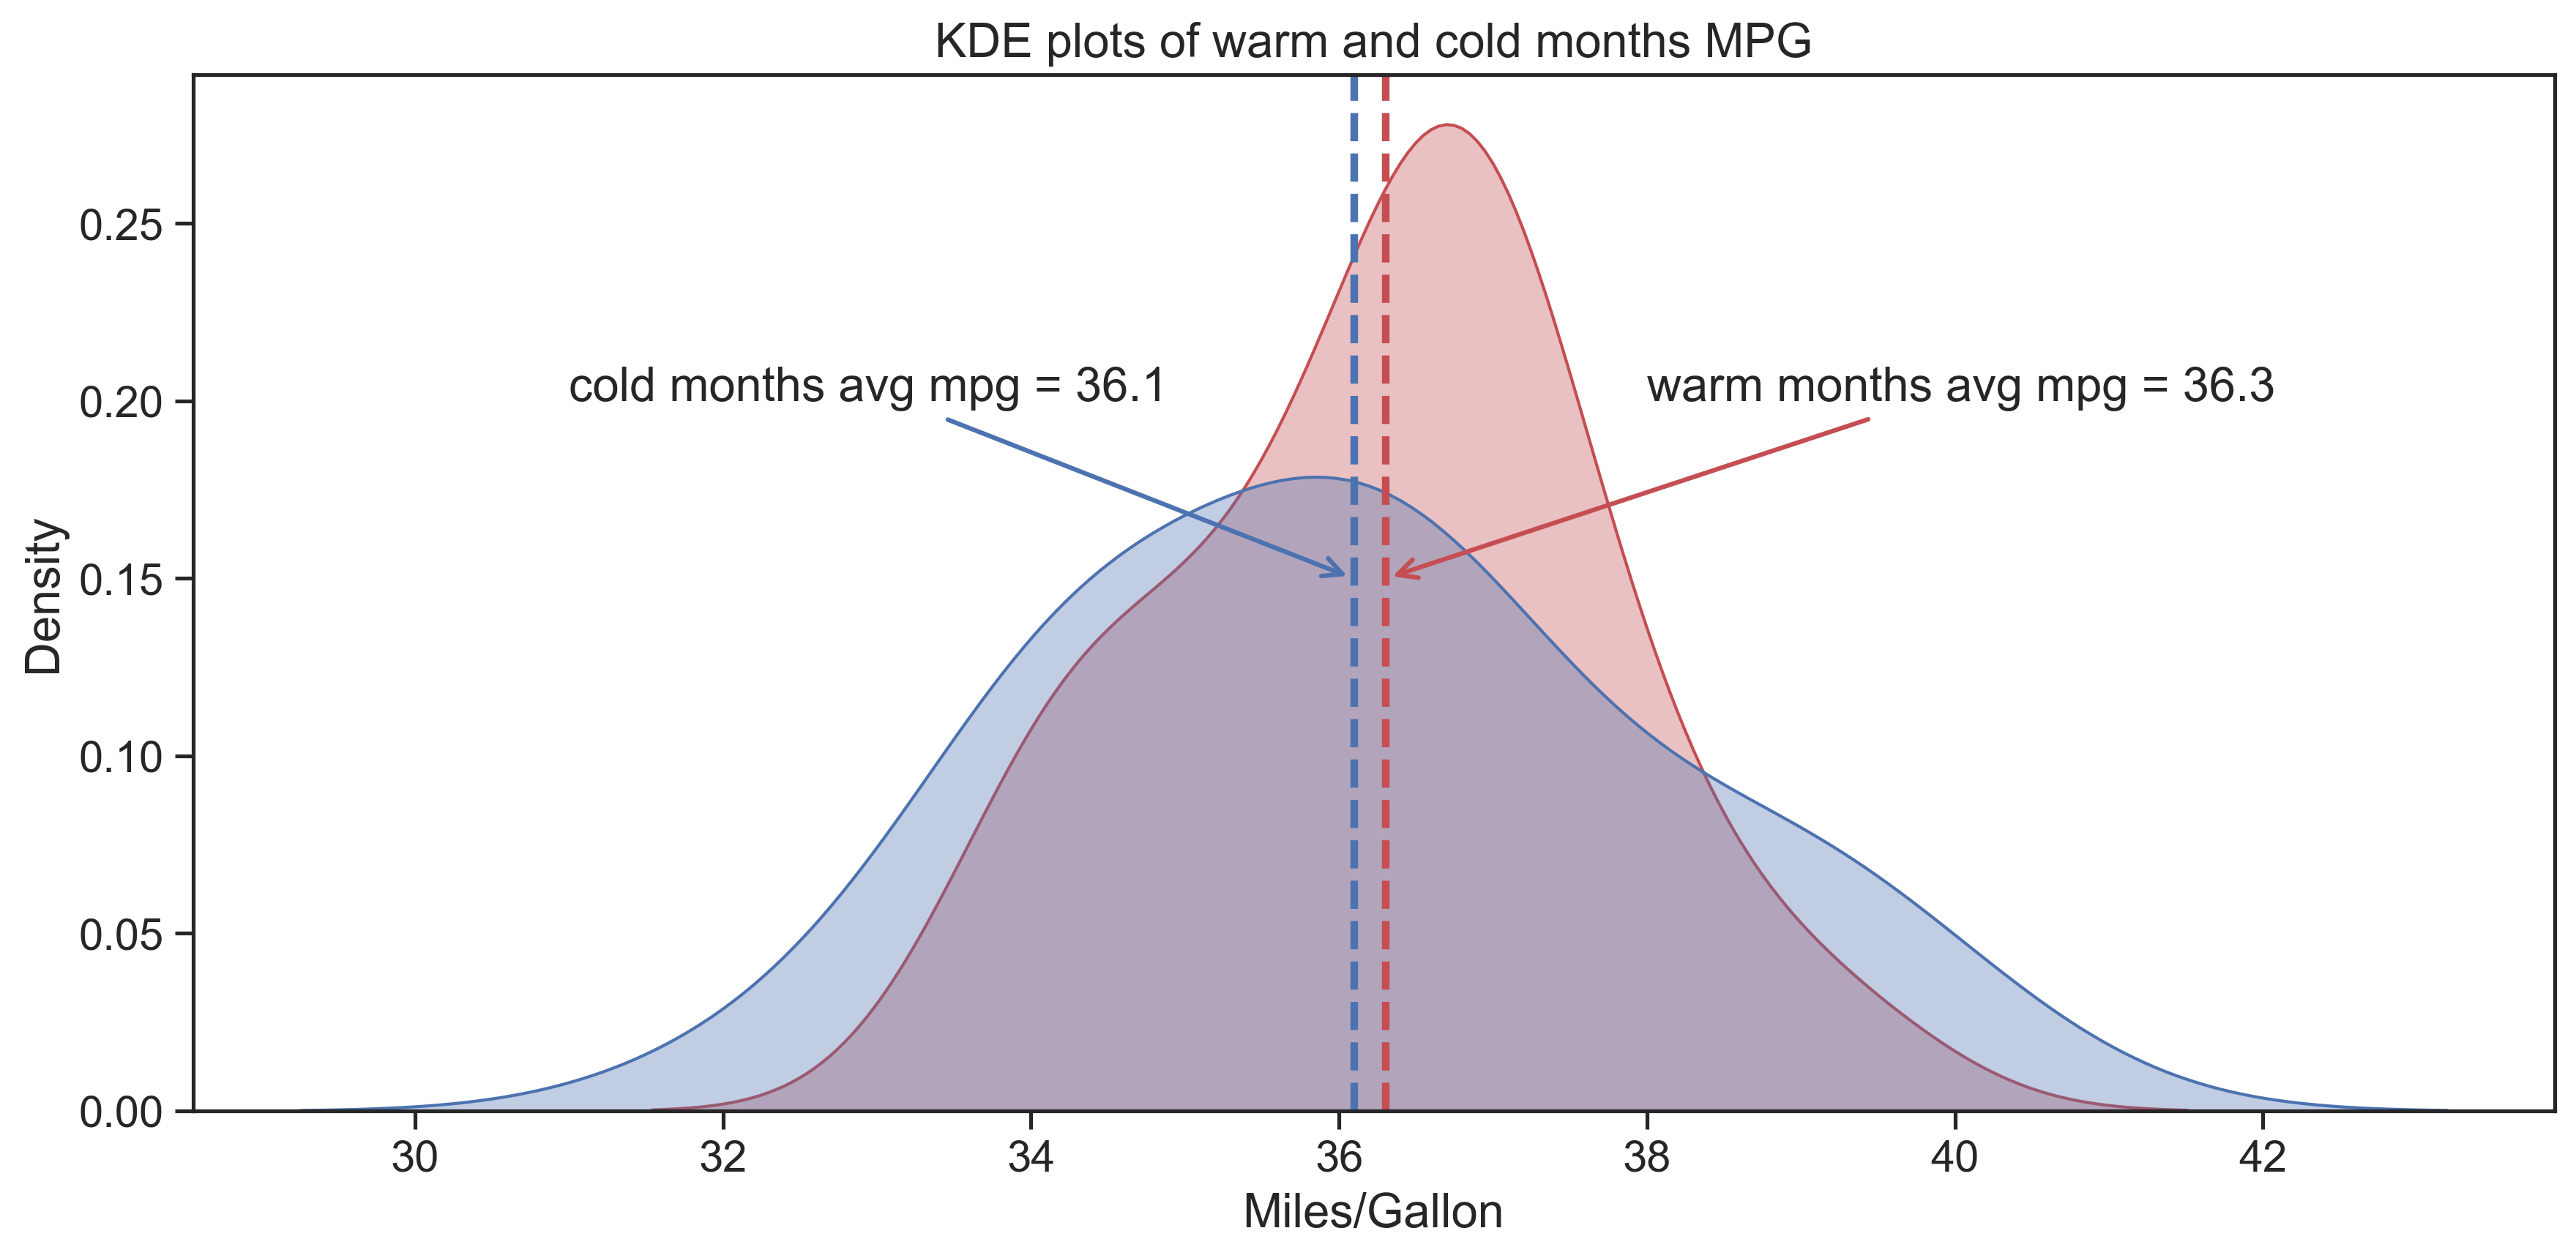

In [18]:
sns.set_theme(font_scale = 1.3, rc={"figure.dpi": 300})
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.kdeplot(warm_months_df['Miles/Gallon'], color='r', shade=True, alpha = 0.35)
sns.kdeplot(cold_months_df['Miles/Gallon'], color='b', shade=True, alpha = 0.35)
plt.axvline(warm_months_df['Miles/Gallon'].mean(), color = 'r',ls = '--', lw = 2.5, label = 'warm months mean')
plt.axvline(cold_months_df['Miles/Gallon'].mean(), color = 'b',ls = '--', lw = 2.5, label = 'cold months mean')
plt.annotate('cold months avg mpg = 36.1', xy=(36.09, 0.15), xytext = (31, 0.20), arrowprops=dict(color = 'b', arrowstyle='->', lw = 1.5))
plt.annotate('warm months avg mpg = 36.3', xy=(36.31, 0.15), xytext = (38, 0.20), arrowprops=dict(color = 'r', arrowstyle='->', lw = 1.5))
plt.title('KDE plots of warm and cold months MPG')
plt.tight_layout();